In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [157]:
df = pd.read_csv('/Users/kristijanboshev/Desktop/stedin_electricity_2018.csv')

In [158]:
df.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,93.94,90.91,76.0,3x25,5926,84.85,21.21
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41.0,1x25,3149,76.47,17.65
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47.0,3x25,3906,76.47,5.88
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45.0,3x25,4696,85.00,15.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,94.12,100.00,71.0,1x25,3557,64.71,5.88


In [159]:
consumption = df.annual_consume
lowtarif= df.annual_consume_lowtarif_perc

In [160]:
import matplotlib.pyplot as plt

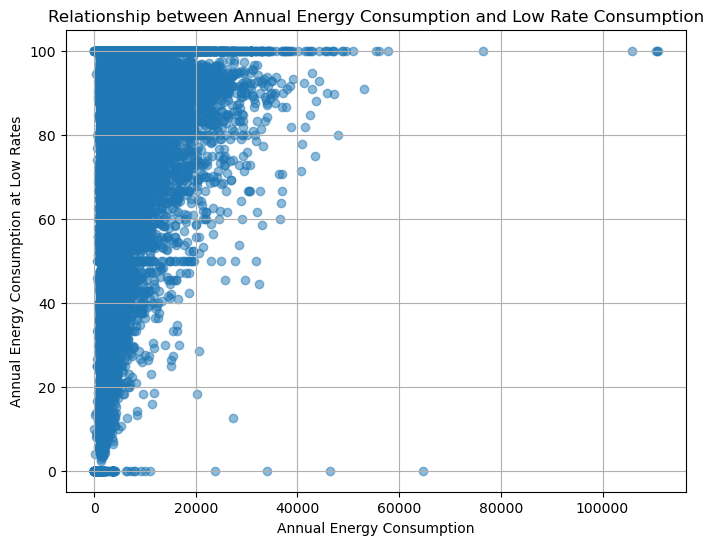

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(consumption, lowtarif, alpha=0.5)
plt.title('Relationship between Annual Energy Consumption and Low Rate Consumption')
plt.xlabel('Annual Energy Consumption')
plt.ylabel('Annual Energy Consumption at Low Rates')
plt.grid(True)
plt.show()

In [162]:
X = df[['annual_consume', 'annual_consume_lowtarif_perc']]


In [163]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [164]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
clusters = kmeans.fit_predict(X_scaled)

In [165]:
df = df.assign(cluster = clusters)

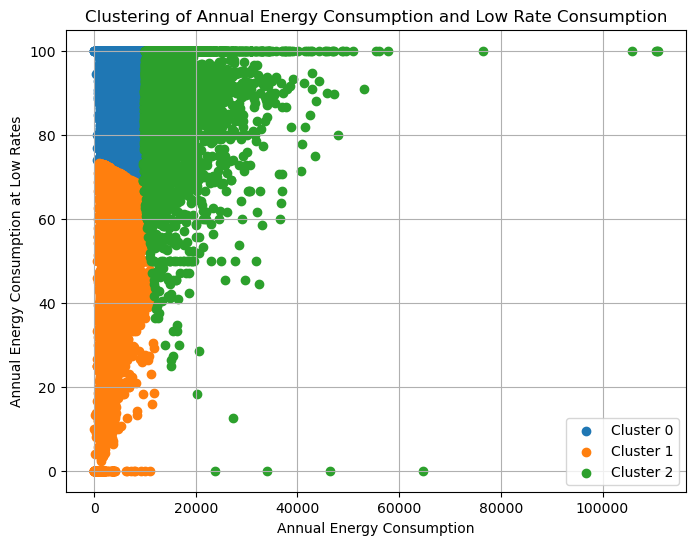

In [166]:
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['annual_consume'], cluster_data['annual_consume_lowtarif_perc'] , label=f'Cluster {i}')
plt.title('Clustering of Annual Energy Consumption and Low Rate Consumption')
plt.xlabel('Annual Energy Consumption')
plt.ylabel('Annual Energy Consumption at Low Rates')
plt.legend()
plt.grid(True)
plt.show()


In [167]:
pd.set_option('display.max_rows', None)

In [168]:
for i in range(k):
    print(f'Cluster {i}:')
    cluster_data = df[df['cluster'] == i]
    cluster_stats = cluster_data[['annual_consume', 'annual_consume_lowtarif_perc']].describe()
    print(cluster_stats)

Cluster 0:
       annual_consume  annual_consume_lowtarif_perc
count    64152.000000                  64152.000000
mean      3565.785899                     94.224446
std       1543.501186                      7.656158
min         41.000000                     68.420000
25%       2553.000000                     90.480000
50%       3236.000000                     98.250000
75%       4075.000000                    100.000000
max      10003.000000                    100.000000
Cluster 1:
       annual_consume  annual_consume_lowtarif_perc
count    16774.000000                  16774.000000
mean      2762.653154                     49.887851
std       1410.508821                     16.683078
min          0.000000                      0.000000
25%       1900.000000                     38.890000
50%       2374.000000                     53.330000
75%       3150.000000                     63.640000
max      11875.000000                     73.330000
Cluster 2:
       annual_consume  annual_c

Кратко објаснување околу кодот: За оваа лабараториска вежба одбрав да користам clustering analysis и датасет за енергетската ефикасност за некој регион во Холандија. Како главни features ги одбрав, генералното годишно користење на електрична енергија и колку од таа енергија се користи на "eфтина струја". Тие две, се ставаат во посебен датафрејм преку кој ќе вршиме понатамошна анализа. Вршиме scaling на нашите features и го одбираме бројот на кластери.Потоа започнува процесот на градење на К-means cluster моделот со горе наведениот број на кластери, притоа додавајќи му го Х датафрејмот со потребните features.И на крај правиме визуелизација и извршување на сите статистички методи преку кој ќе можеме да извлечеме некаков заклучок.

Кратко објаснување околу прашањето како ова би помогнало во транзицијата кон паметни урбани енергетски системи: Преку кластерите можеме да видеме 3 различни видови на домаќинства.Ова ќе помогне така што ќе ги видеме најразличните можни исходи кој што ги имаме монетално и на каков начин тие можат да се подобрат во иднина за градење на паметни урбани енергетски системи.Да земеме за пример домаќинствата од cluster 1 имаат средна потрошувачка на енергија, но половина од неа ја плаќаат на скапа тарифа, тоа значи дека тука имаме простор за голем напредок така што ќе ги поттикнеме да ја користат енергијата на ниска тарифа преку најразлични кампањи и стратегии. Преку ова ќе добиеме план за намалување на трошоците и придонесување за одржливоста на градот. 

                                                                                        Кристијан Бошев 203159